# Exercise 4: Constructing a visual report with Matplotlib
## This programming exercise was provided by Dr. Matt Satusky, Research Scientist at the Renaissance Computing Institute

### You are performing an analysis of fuel efficiency in personal vehicles from model years 1970 - 1980. You have extracted the following data in `list` form:
- `all_mpgs`: Fuel economy (miles per gallon) for all selected vehicle models across all years
- `all_weights`: Weights (lbs) for all selected vehicle models across all years
- `unique_model_years`: A list of model years from 1970 to 1980
- `yearly_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles in each model year
- `yearly_mean_horsepower`: Average engine power (horsepower) for vehicles in each model year
- `origins_1970`: The origin for each vehicle from the 1970 model year
- `origins_1980`: The origin for each vehicle from the 1980 model year
- `origin_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles from each origin
- `origin_mean_horsepower`: Average engine power (horsepower) for vehicles from each origin
- `origin_mean_cylinders`: Average number of engine cylinders for vehicles from each origin
- `origin_mean_displacement`: Average cylinder volume (cm^3) for vehicles from each origin
- `origin_mean_weight`: Average weight (lbs) for vehicles from each origin
- `origin_mean_acceleration`: Average acceleration (ft/s^2) for vehicles from each origin

### Your task is to create a visual report for these data. You will create a single Matplotlib Figure containing the following subplots:
1. A scatter plot with `all_weights` on the x-axis and `all_mpgs` on the y-axis
2. A line plot with `unique_model_years` with **separate** y-axes for `yearly_mean_mpgs` and `yearly_mean_horsepower`. Include markers for each data point.
3. Two pie charts, one each for the number of models by origin in `origins_1970` and `origins_1980`
4. A series of 6 bar plots with `origin_mean_mpgs`, `origin_mean_horsepower`, `origin_mean_cylinders`, `origin_mean_displacement`, `origin_mean_weight`, and `origin_mean_acceleration` on y-axis, and each should have `unique_origins` on the x-axis.

### The subplots should use a layout with 3 rows:
- Row 1, three subplots: Scatter plot (item 1 above), 2 pie charts (item 3)
- Row 2, 1 subplot stretched across the figure: Line plot (item 2)
- Row 3, 6 subplots: 6 bar plots (item 4)

### Be sure to give each subplot a title and label the axes with appropriate descriptor and units. You may customize the appearance (colors, marker types, etc.) in any way you think looks appealing


### The next cell loads the data and should not be changed.

In [1]:
# Do not change this cell
import pandas as pd
import seaborn as sns

data = sns.load_dataset('mpg')

all_mpgs = data['mpg'].to_list()
all_weights = data['weight'].to_list()

unique_model_years = list(data['model_year'].unique())
unique_origins = sorted(list(data['origin'].unique()))

yearly_mean_mpgs = data.groupby('model_year').mean(numeric_only=True)['mpg'].to_list()
yearly_mean_horsepower = data.groupby('model_year').mean(numeric_only=True)['horsepower'].to_list()

origins_1970 = data.loc[data['model_year'] == 70, 'origin']
origins_1980 = data.loc[data['model_year'] == 80, 'origin']

origin_mean_mpgs = data.groupby('origin').mean(numeric_only=True)['mpg'].to_list()
origin_mean_horsepower = data.groupby('origin').mean(numeric_only=True)['horsepower'].to_list()
origin_mean_cylinders = data.groupby('origin').mean(numeric_only=True)['cylinders'].to_list()
origin_mean_displacement = data.groupby('origin').mean(numeric_only=True)['displacement'].to_list()
origin_mean_weight = data.groupby('origin').mean(numeric_only=True)['weight'].to_list()
origin_mean_acceleration = data.groupby('origin').mean(numeric_only=True)['acceleration'].to_list()


Text(0, 0.5, 'Fuel Economy (miles/gallon)')

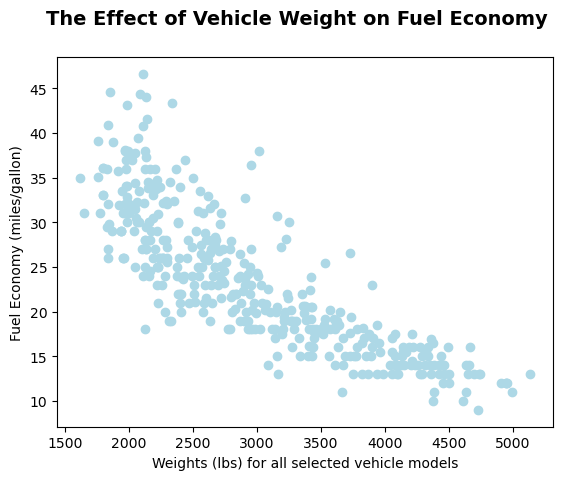

In [6]:
#Import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

#setting x and y variables
x = np.array(all_weights)
y = np.array(all_mpgs)

# Plot
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'lightblue')

# Set titles for the figure and the subplot 
fig.suptitle('The Effect of Vehicle Weight on Fuel Economy', fontsize=14, fontweight='bold')

ax.set_xlabel('Weights (lbs) for all selected vehicle models')
ax.set_ylabel('Fuel Economy (miles/gallon)')


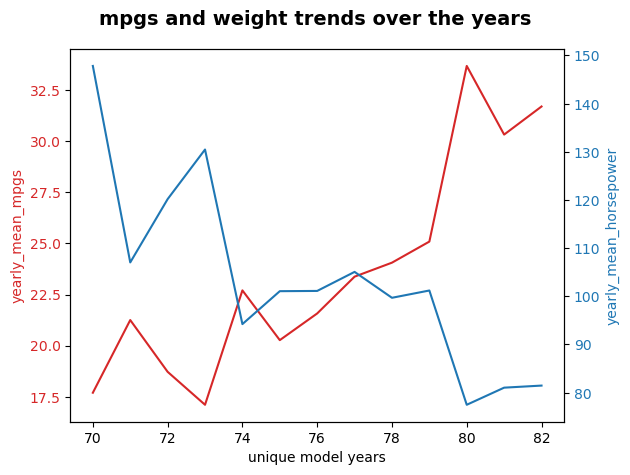

In [9]:
x = np.array(unique_model_years)
y = np.array(yearly_mean_mpgs)
y2 = np.array(yearly_mean_horsepower)

ax3, plt1 = plt.subplots()

color = 'tab:red'
plt1.set_xlabel('unique model years')
plt1.set_ylabel('yearly_mean_mpgs', color=color)
plt1.plot(x, y, color=color)
plt1.tick_params(axis='y', labelcolor=color)

plt2 = plt1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
plt2.set_ylabel('yearly_mean_horsepower', color=color)  # we already handled the x-label with ax1
plt2.plot(x, y2, color=color)
plt2.tick_params(axis='y', labelcolor=color)

# Set titles for the figure and the subplot 
ax3.suptitle('mpgs and weight trends over the years', fontsize=14, fontweight='bold')

ax3.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




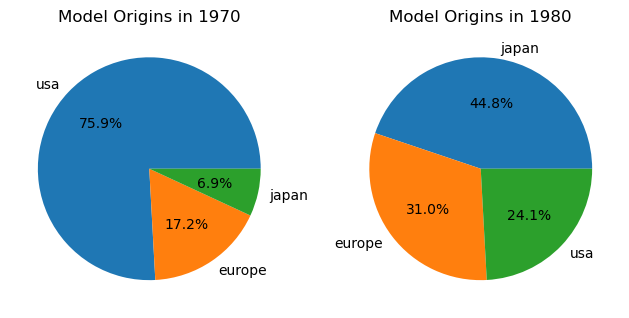

In [20]:
# Filter the DataFrame for the years of interest
origins_1970 = data.loc[data['model_year'] == 70, 'origin'].value_counts()
origins_1980 = data.loc[data['model_year'] == 80, 'origin'].value_counts()

# Create a figure and two subplots (axes)
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns

# Create the pie chart for 1970 models on ax1
ax1.pie(origins_1970, labels=origins_1970.index, autopct='%1.1f%%')
ax1.set_title('Model Origins in 1970')

# Create the pie chart for 1980 models on ax2
ax2.pie(origins_1980, labels=origins_1980.index, autopct='%1.1f%%')
ax2.set_title('Model Origins in 1980')

ax0 = fig 

# Adjust layout to prevent overlap
plt.tight_layout()

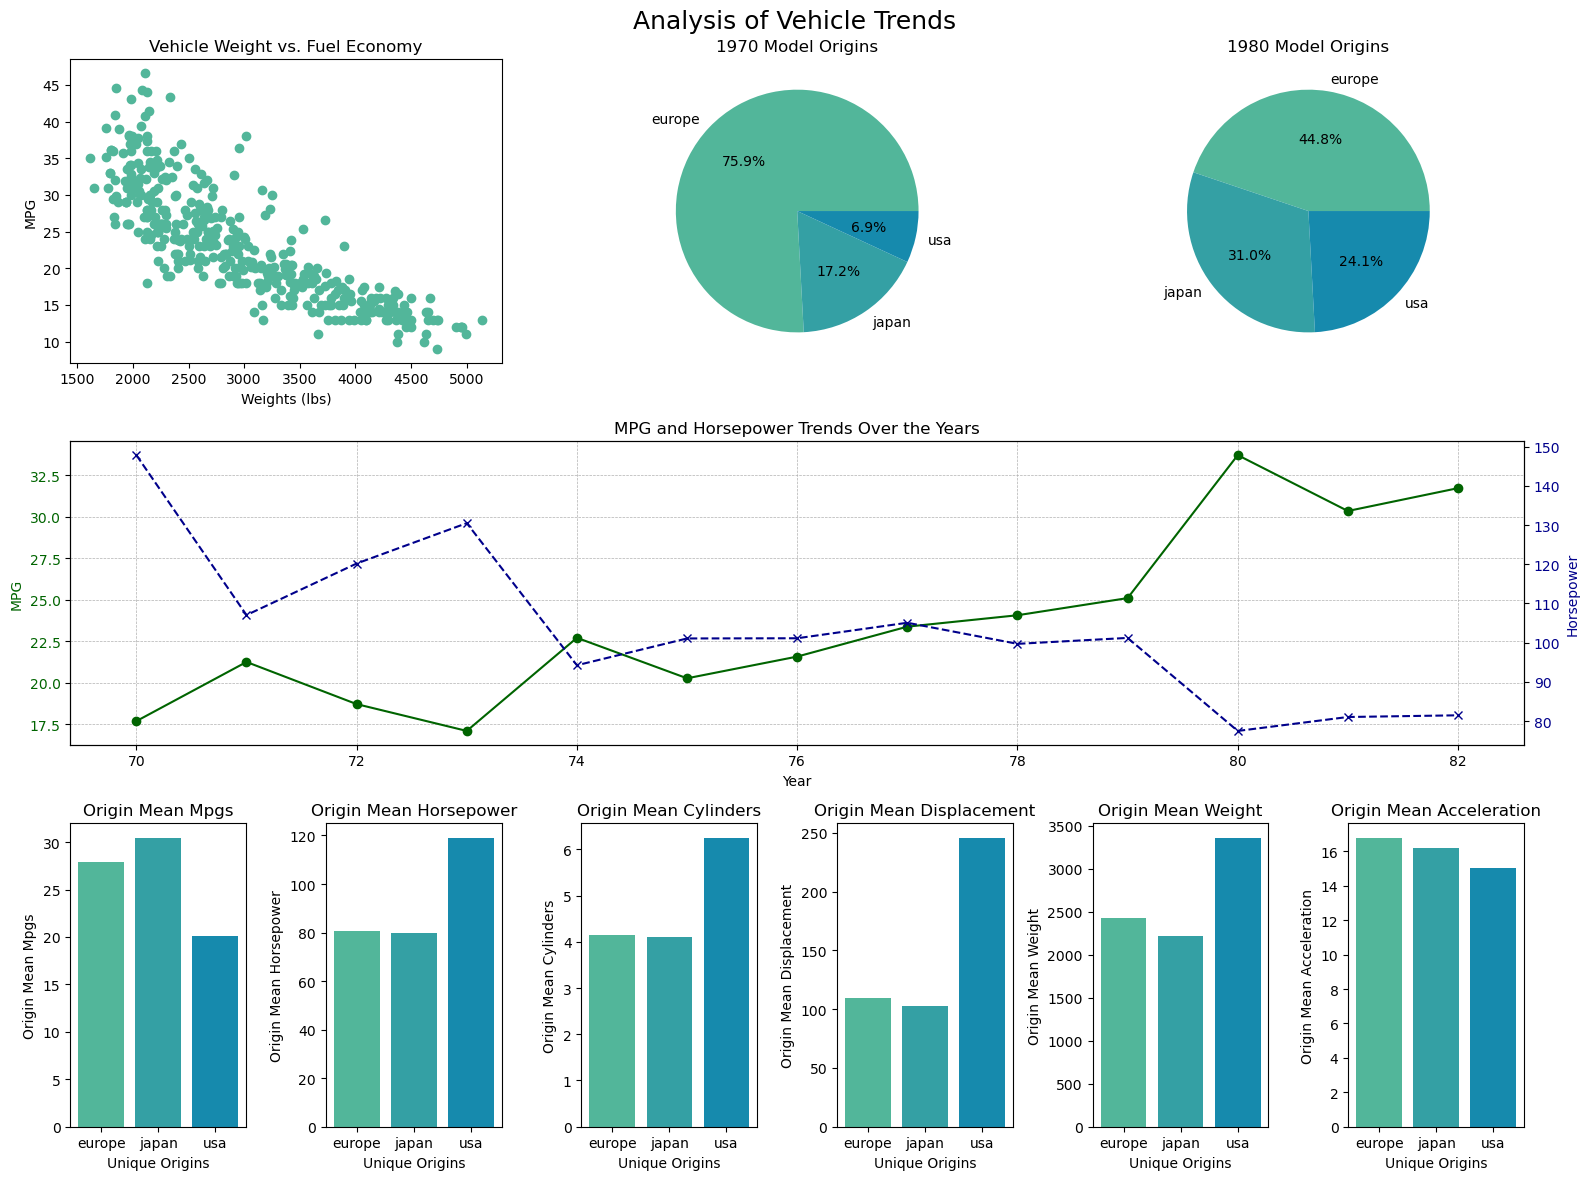

In [69]:
# Setup figure and GridSpec
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 6)
fig.suptitle('Analysis of Vehicle Trends', fontsize=18)

# Scatter plot
ax = fig.add_subplot(gs[0, 0:2])
ax.scatter(all_weights, all_mpgs, color='#52b69a')
ax.set_xlabel('Weights (lbs)')
ax.set_ylabel('MPG')
ax.set_title('Vehicle Weight vs. Fuel Economy')

# Pie charts for vehicle origins by year
# Define a harmonized color scheme for origins
colors = {'usa': '#168aad', 'europe': '#52b69a', 'japan': '#34a0a4'}
# Ensure the labels and colors match between the two pie charts
labels = sorted(set(origins_1970.index) | set(origins_1980.index))
colors_list = [colors[label] for label in labels]

origins_1970 = data.loc[data['model_year'] == 70, 'origin'].value_counts()
origins_1980 = data.loc[data['model_year'] == 80, 'origin'].value_counts()
ax1 = fig.add_subplot(gs[0, 2:4])
ax2 = fig.add_subplot(gs[0, 4:6])
ax1.pie(origins_1970, labels=labels, colors=colors_list, autopct='%1.1f%%')
ax1.set_title('1970 Model Origins')
ax2.pie(origins_1980, labels=labels,  colors=colors_list, autopct='%1.1f%%')
ax2.set_title('1980 Model Origins')

# MPG line plot
ax3 = fig.add_subplot(gs[1, :])
color_mpg = 'darkgreen'  # Using a darker green color for MPG
ax3.set_xlabel('Year')
ax3.set_ylabel('MPG', color=color_mpg)
ax3.plot(unique_model_years, yearly_mean_mpgs, color=color_mpg, label='MPG', linestyle='-', marker='o')
ax3.tick_params(axis='y', labelcolor=color_mpg)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add gridlines

# Horsepower line plot
color_hp = 'darkblue'  # Using a darker blue color for horsepower
ax4 = ax3.twinx()  # Create a second y-axis for horsepower
ax4.set_ylabel('Horsepower', color=color_hp)
ax4.plot(unique_model_years, yearly_mean_horsepower, color=color_hp, label='Horsepower', linestyle='--', marker='x')
ax4.tick_params(axis='y', labelcolor=color_hp)


# Title and legend
ax3.set_title('MPG and Horsepower Trends Over the Years')

# Create a figure to contain all the subplots

x = np.array(unique_origins)
y = np.array(origin_mean_mpgs)
y2 = np.array(origin_mean_horsepower)
y3 = np.array(origin_mean_cylinders)
y4 = np.array(origin_mean_displacement)
y5 = np.array(origin_mean_weight)
y6 = np.array(origin_mean_acceleration)

colors = ['#52b69a', '#34a0a4', '#168aad']  
#The below code will create six plots. 
ax5 = fig.add_subplot(gs[2, 0])
ax5.set_title('Origin Mean Mpgs')
ax5.set_xlabel('Unique Origins')
ax5.set_ylabel('Origin Mean Mpgs')
ax5.bar(x,y, color=colors)

ax6 = fig.add_subplot(gs[2, 1])
ax6.set_title('Origin Mean Horsepower')
ax6.set_xlabel('Unique Origins')
ax6.set_ylabel('Origin Mean Horsepower')
ax6.bar(x,y2, color=colors)

ax7 = fig.add_subplot(gs[2, 2])
ax7.set_title('Origin Mean Cylinders')
ax7.set_xlabel('Unique Origins')
ax7.set_ylabel('Origin Mean Cylinders')
ax7.bar(x,y3, color=colors)

ax8 = fig.add_subplot(gs[2, 3])
ax8.set_title('Origin Mean Displacement')
ax8.set_xlabel('Unique Origins')
ax8.set_ylabel('Origin Mean Displacement')
ax8.bar(x,y4, color=colors)

ax9 = fig.add_subplot(gs[2, 4])
ax9.set_title('Origin Mean Weight')
ax9.set_xlabel('Unique Origins')
ax9.set_ylabel('Origin Mean Weight')
ax9.bar(x,y5, color=colors)

ax10 = fig.add_subplot(gs[2, 5])
ax10.set_title('Origin Mean Acceleration')
ax10.set_xlabel('Unique Origins')
ax10.set_ylabel('Origin Mean Acceleration')
ax10.bar(x,y6, color=colors)


plt.tight_layout()
plt.show()